In [1]:
%matplotlib inline

import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
from md_distance import md_distance
from md_distance import gen_pairs
from refframes import refframe_switch1
from refframes import refframe_switch2

In [2]:
source = 'vreede'
run = 'run0'
if source == 'vreede':
    current_dir = '/home/sanderroet/Ras-JV/'+run+'/analysis/'
    name = 'vreede_'+run
elif source == 'carbon':
    current_dir = '/home/sanderroet/carbon/kras_100ns/'+run+'/analysis/'
    name = 'carbon_'+run
xtc = current_dir + 'vis-md.xtc'
pdb = current_dir + 'vis-md.pdb'

In [3]:
%%time
trj = md.load(xtc, top = pdb)
#reference = md.load(test_pdb)

CPU times: user 18.3 s, sys: 1.71 s, total: 20.1 s
Wall time: 24 s


In [4]:
%%time
topology = trj.topology
res75 = topology.select('protein and resSeq 75 and name H')
res74 = topology.select('protein and resSeq 74 and name H')
res73 = topology.select('protein and resSeq 73 and name H')
met72 = topology.select('protein and resSeq 72 and name H')
res71 = topology.select('protein and resSeq 71 and name O')
res70 = topology.select('protein and resSeq 70 and name O')
res69 = topology.select('protein and resSeq 69 and name O')
arg68 = topology.select('protein and resSeq 68 and name O')
for i in arg68:
    print(topology.atom(i).name)

O
CPU times: user 233 ms, sys: 0 ns, total: 233 ms
Wall time: 234 ms


In [5]:
%%time
pairs = [[met72,arg68],[res69,res73],[res70,res74],[res71,res75]]
pair_list = []
for i in pairs:
    pair_list.append(gen_pairs(i))


CPU times: user 58 µs, sys: 5 µs, total: 63 µs
Wall time: 68.4 µs


In [6]:
%%time
results = []
for i, e in enumerate(pair_list):
    results.extend(md_distance(trj, e , mode = 'min'))
min_total = [[]]
for i, e in enumerate(results[0]):
    temp = []
    for j, e in enumerate(results):
        temp.append(results[j][i])
#    print(temp)
    min_total[0].append(min(temp))


CPU times: user 113 ms, sys: 0 ns, total: 113 ms
Wall time: 113 ms


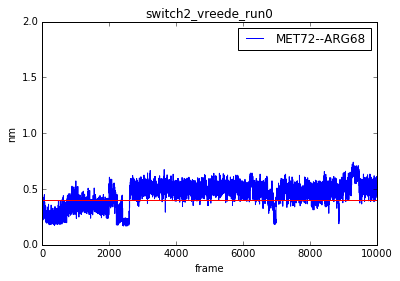

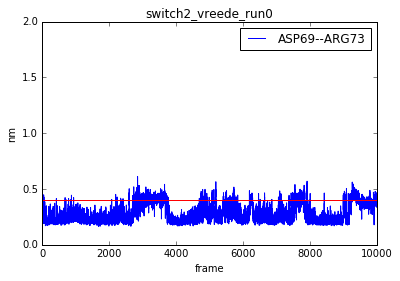

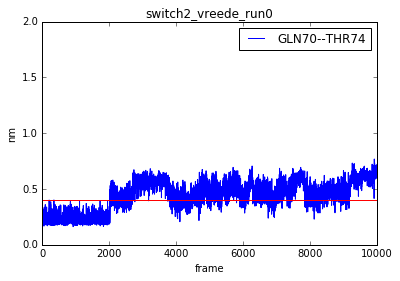

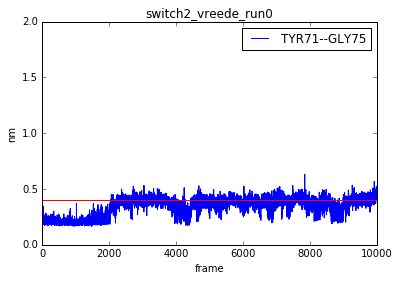

In [7]:


for i, e in enumerate(results):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    y = e
    x = range(len(e))

    lbl = str(topology.atom(pairs[i][0][0]).residue) + '--' + str(topology.atom(pairs[i][1][0]).residue)
    start, stop = refframe_switch2[name]
    ax.plot(x,y, label = lbl)

    for i, j in enumerate(start):
        x1 = range(j,stop[i])
        y1 = e[j:stop[i]]
        ax.plot(x1,y1, c='green')
    ax.plot([x[0],x[-1]],[0.40,0.40], c='red')
    plt.ylim([0.0,2.0])
    ax.set_ylabel('nm')
    ax.set_xlabel('frame')
    ax.set_title('switch2_'+source+'_'+run)
    ax.legend()
    plt.show
fig.savefig(current_dir+'helix.png')